In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
digits = datasets.load_digits()
data = digits['data']
target = digits['target']
#len(data)

In [4]:
data_train,data_test,target_train,target_test  = train_test_split(data,target,test_size=0.2)

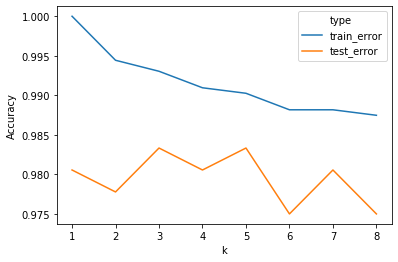

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
error_pd = pd.DataFrame(columns = ['k','Accuracy','type'])

for k in range(1,9):
    error_1={}
    error_2={}
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(data_train,target_train)
    train_error = neigh.score(data_train,target_train)
    #print(train_error)
    test_error = neigh.score(data_test,target_test)
    if(k==3):
        knn_score = test_error
    error_1['k']=k
    error_1['Accuracy']=train_error
    error_1['type'] = 'train_error'
    #print(error_1)
    error_2['k']=k
    error_2['Accuracy']=test_error
    error_2['type'] = 'test_error'
    #print(error_1)
    #error['test_error']=test_error
    error_pd = error_pd.append(error_1,ignore_index=True)
    error_pd = error_pd.append(error_2,ignore_index=True)
#error_pd
sns.lineplot(x="k",y="Accuracy",hue="type",data=error_pd)

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [7]:
rbf_SVM = SVC(kernel="rbf",gamma="auto")
linear_SVM = SVC(kernel="linear",gamma="auto")
sigmoid_SVM = SVC(kernel="sigmoid",gamma="auto")

In [8]:
rbf_SVM.fit(data_train,target_train)
linear_SVM.fit(data_train,target_train)
sigmoid_SVM.fit(data_train,target_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
y_1 = rbf_SVM.predict(data_test)
print(classification_report(target_test,y_1))

y_2 = linear_SVM.predict(data_test)
print(classification_report(target_test,y_2))
svm_score = linear_SVM.score(data_test,target_test)
y_3 = sigmoid_SVM.predict(data_test)
print(classification_report(target_test,y_3))

              precision    recall  f1-score   support

           0       1.00      0.42      0.60        40
           1       1.00      0.31      0.47        39
           2       1.00      0.07      0.13        42
           3       1.00      0.36      0.53        39
           4       1.00      0.47      0.64        34
           5       0.12      1.00      0.22        30
           6       1.00      0.56      0.72        32
           7       1.00      0.41      0.58        39
           8       1.00      0.11      0.21        35
           9       1.00      0.60      0.75        30

    accuracy                           0.41       360
   macro avg       0.91      0.43      0.48       360
weighted avg       0.93      0.41      0.48       360

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      1.00      0.99        39
           2       1.00      1.00      1.00        42
           3       0.93 

E:\software\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


better to use linear kernel

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

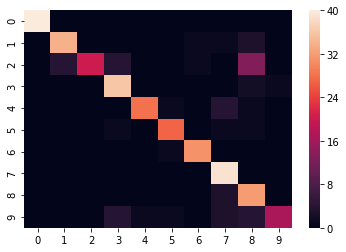

In [11]:
nb = GaussianNB()
nb.fit(data_train,target_train)
y = nb.predict(data_test)
confusion_data = confusion_matrix(target_test,y)
sns.heatmap(confusion_data)
nb_score = nb.score(data_test,target_test)

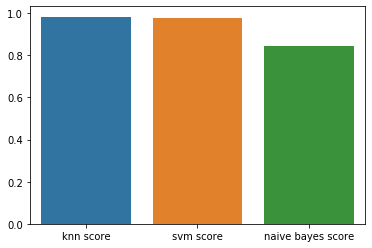

In [12]:
x=["knn score","svm score","naive bayes score"]
y = [knn_score,svm_score,nb_score]
sns.barplot(x,y)

1. Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
gap_pd = pd.read_csv("./gapminder.csv")
gap_pd.head(3)
gap_pd['Region'].unique()

array(['Middle East & North Africa', 'Sub-Saharan Africa', 'America',
       'Europe & Central Asia', 'East Asia & Pacific', 'South Asia'],
      dtype=object)

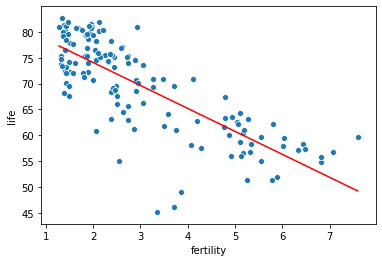

In [14]:
lr = LinearRegression()
x = np.reshape(gap_pd['fertility'].values,(-1,1))
y = gap_pd['life']

lr.fit(x,y)
lr.coef_
lr.intercept_
y_pred = lr.predict(x)
sns.lineplot(gap_pd['fertility'],y_pred,color='red')
sns.scatterplot(gap_pd['fertility'],y)

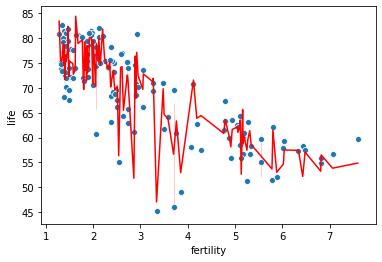

In [15]:
lr = LinearRegression()

x_arr = []
index = 0
for index,row in gap_pd.iterrows():
    row_1 = []
    for name in gap_pd.columns:
        #print(name)
        if name == 'life' or name == 'Region':
            continue
        row_1.append(row[name])
        #x_arr.append(np.reshape(gap_pd[name].values,(-1,1)))
        #x_arr = np.insert(x_arr,index,values=np.reshape(gap_pd[name].values,(-1,1)),axis=1)
        # print(len(x_arr))
    x_arr.append(row_1)
x_arr = np.array(x_arr)    
y = gap_pd['life']
#x_arr.shape
lr.fit(x_arr,y)
#lr.coef_
#lr.intercept_
y_pred = lr.predict(x_arr)
sns.lineplot(gap_pd['fertility'],y_pred,color='red')
sns.scatterplot(gap_pd['fertility'],y)

In [18]:
credit_pd = pd.read_csv('./creditcard.csv')
credit_pd.head(3)
for idx,row in credit_pd.iterrows():
    if(row['Class']==0):
        row['type'] = 'fraud'
    else:
        row['type'] = 'nonfraud'
credit_pd

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


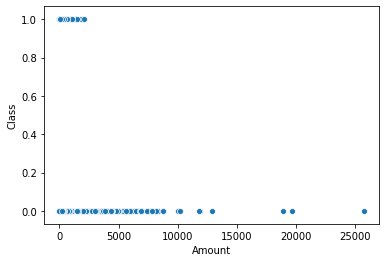

In [17]:
sns.scatterplot(credit_pd['Amount'],credit_pd['Class'])